## Research question 5
Does lack of family support or educational support contribute as a factor to consuming alcohol?


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt

from sklearn import set_config
set_config(transform_output = "pandas")

## function to save hq figs

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')
for col in X_test.columns:
    print(col)

sex_F
sex_M
famsize_GT3
famsize_LE3
Pstatus_A
Pstatus_T
Mjob_at_home
Mjob_health
Mjob_other
Mjob_services
Mjob_teacher
Fjob_at_home
Fjob_health
Fjob_other
Fjob_services
Fjob_teacher
guardian_father
guardian_mother
guardian_other
schoolsup_no
schoolsup_yes
famsup_no
famsup_yes
paid_no
paid_yes
activities_no
activities_yes
higher_no
higher_yes
romantic_no
romantic_yes
age
Medu
Fedu
studytime
failures
famrel
freetime
goout
health
absences
avg_grade
alc


In [4]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train [['famsup_no', 'famsup_yes']] 
y_test = X_test['alc']
X_test = X_test [['famsup_no', 'famsup_yes']]
#X_test = X_test.drop(columns = 'alc')

## ZeroR Classifier

In [5]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [6]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [7]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


## Hyerparameter Tuning on KNN Classifier

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [9]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [10]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [11]:
best_grid_knn = grid_search_knn.best_estimator_

In [12]:
best_grid_knn

KNeighborsClassifier()

## Applying best estimators in KNN classifiers


[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



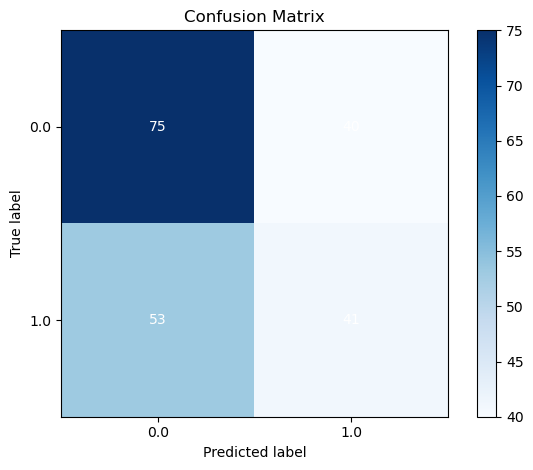

In [13]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [14]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
204,1.0,1.0
205,1.0,0.0
206,0.0,0.0
207,0.0,0.0


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.5550239234449761


              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



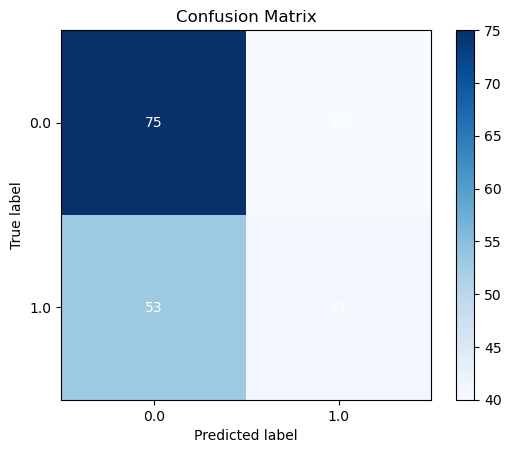

In [17]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

## Hyperparameter tuning on Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
}

In [20]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [21]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=5)

## Appying best estimators on Decision Tree

[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



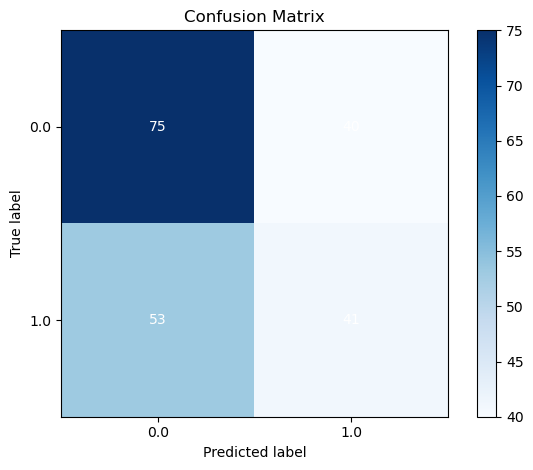

In [22]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [23]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  2 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  3 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  4 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  5 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  6 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  7 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  8 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  9 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  10 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  11 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  12 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  13 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  14 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  15 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  16 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  17 , Train Acc. =  0.533 , Test Acc. =  0.555
Max De

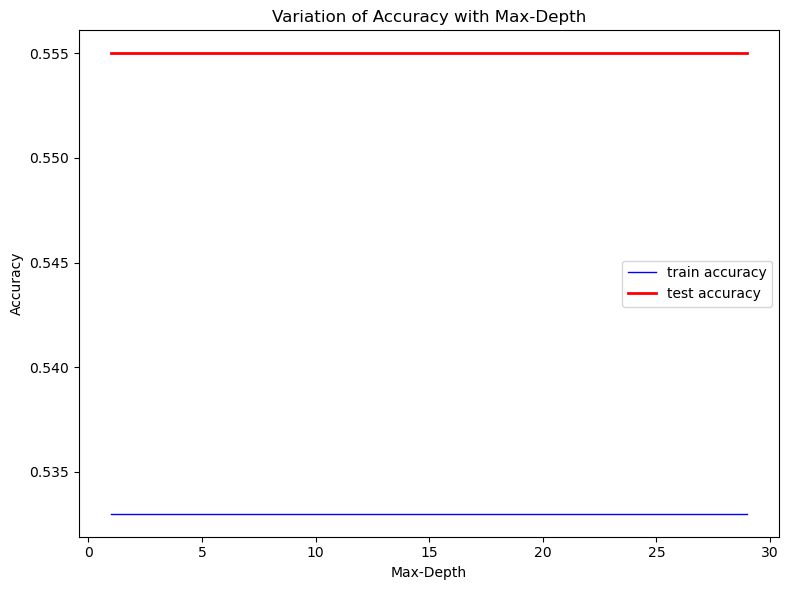

In [24]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [25]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))

Confusion Matrix for Train Set


,0,1
0,292,166
1,262,196


In [26]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,75,40
1,53,41


In [27]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.53      0.64      0.58       458
         1.0       0.54      0.43      0.48       458

    accuracy                           0.53       916
   macro avg       0.53      0.53      0.53       916
weighted avg       0.53      0.53      0.53       916



In [28]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



## Hyperparameter Tuning on Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [30]:
param_grid= {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [31]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [32]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_features=None, n_estimators=10)

In [33]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=10)

In [34]:
best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



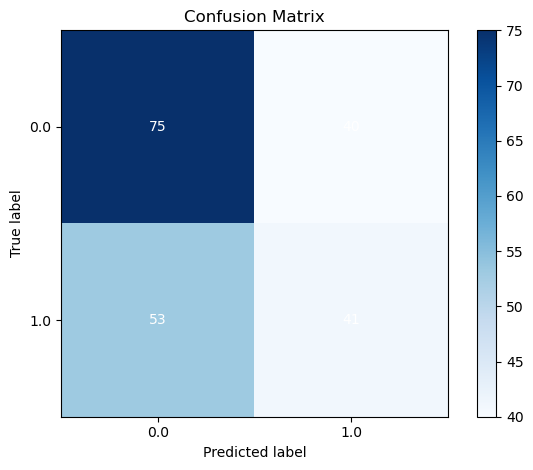

In [35]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[75 40]
 [53 41]]
0.5550239234449761
              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



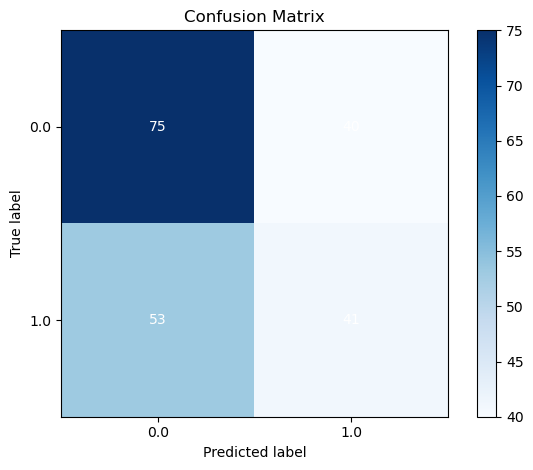

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction);
save_fig('Confusion Matrix for Random forest q3')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

## Hyperparameter TUning on Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [40]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5,

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.39379e-17): result may not be accurate.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about t

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [41]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty='l1', solver='liblinear')

[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



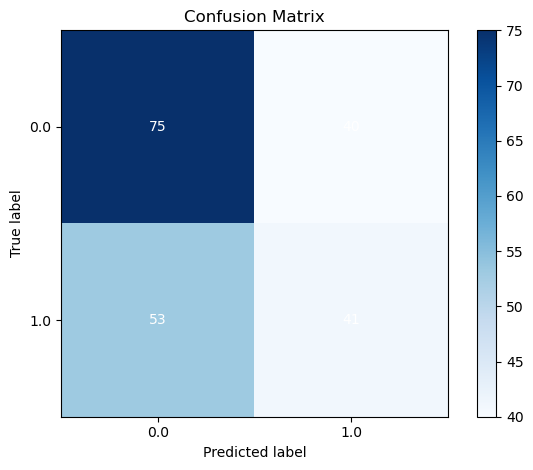

In [42]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [43]:
from sklearn.svm import SVC

In [44]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [45]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ...................

(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse4

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=15, splitter=random; total time=   0.0s
[CV] END ......criterion=gin

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ........criterion=g

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=30, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=30, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=30, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=30, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=10, splitter=random; total time=   0.0s
[CV] END ...criterion=entrop

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cs

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=25, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=25, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=50, weights=distance; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ......criterion=gin

45/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/met

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test p

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError

    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibneha

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py",

[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.1s
[CV] END

[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ......penalty=l1, 

[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l1, random_state=42, solver=saga; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ..........penalty=l1, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l1, random_state=None, solver=sag; total time=   0.0s
[CV] END ..........penalty=l

[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion

[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ......penalty=l2, random_state=42, solver=newton-cg; total time=   0.0s
[CV] END ............penalty=l2, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l2, random_state=42, solver=sag; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ...........penalty=l2, random_state=42, solver=saga; total time=   0.0s
[CV] END ........penalty=l2, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l2, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l2,

[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.1s
[CV] END c

[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l2, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END .penalty=elasticnet, random_state=None, solver=saga; total time=   0.0s
[CV] END .penalty=elasticnet, random_state=None, solver=saga; total time=   0.0s
[CV] END .penalty=elasticnet, random_state=None, solver=saga; total time=   0.0s
[CV] END .penalty=elasticnet, random_state=None, solver=saga; total time=   0.0s
[CV] END .penalty=elasticnet, random_state=None, solver=saga; total time=   0.0s
[CV] END .penalty=elasticnet, random_state=None, solver=saga; total time=   0.0s
[CV] END .penalty=elasticnet, random_state=None, solver=saga; total time=   0.0s
[CV] END .penalty=elasticnet

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kerne

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=a

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=Fal

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, pr

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kern

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=sigmoid

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, pr

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=rbf, pr

[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gam

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kerne

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.52949116 0.52949116
 0.52949116 0.52949116 0.52949116 0.52949116 0.52949116 0.52949116
 0.53278786 0.532787

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [46]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



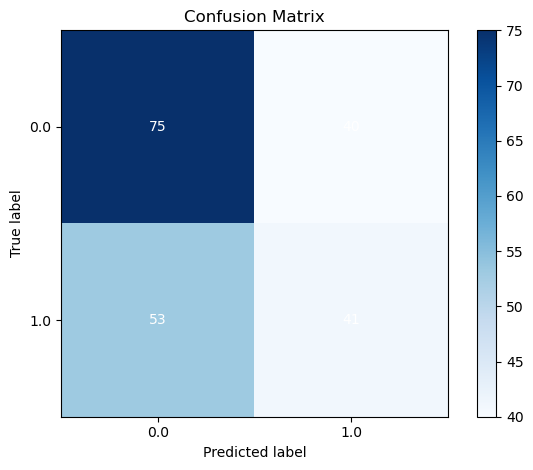

In [47]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [48]:
from  sklearn.naive_bayes import MultinomialNB

In [49]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [50]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_t

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [51]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(alpha=0.01, fit_prior=False)

[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



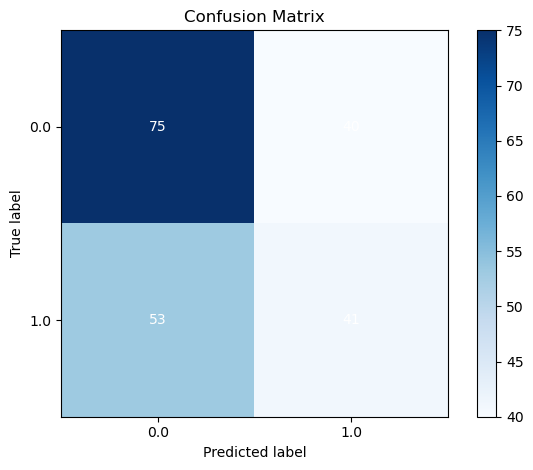

In [52]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Ensembling learning

In [53]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## HArd voting classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [55]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc)
    ], 
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_features=None,
                                                     n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42))])

In [56]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.5550239234449761
DecisionTreeClassifier 0.5550239234449761
LogisticRegression 0.5550239234449761
RandomForestClassifier 0.5550239234449761
SVC 0.5550239234449761
VotingClassifier 0.5550239234449761


## Soft voting classifier

In [57]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability = True)
voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc)
    ], 
    voting = 'soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_features=None,
                                                     n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42))],
                 voting='soft')

In [58]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.5550239234449761
DecisionTreeClassifier 0.5550239234449761
LogisticRegression 0.5550239234449761
RandomForestClassifier 0.5550239234449761
SVC 0.5550239234449761
VotingClassifier 0.5550239234449761


## bagging and pasting

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [60]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.5327510917030568
Test Accuracy 0.5550239234449761


## impact of no. of estimators

In [61]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  100  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  150  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  200  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  250  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  300  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  350  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  400  train acc =  0.5327510917030568  test acc =  0.5550239234449761 oob =  0.5327510917030568
Num of estimators:  450  train acc =  0.5327510917030568  test acc =  0.555023923

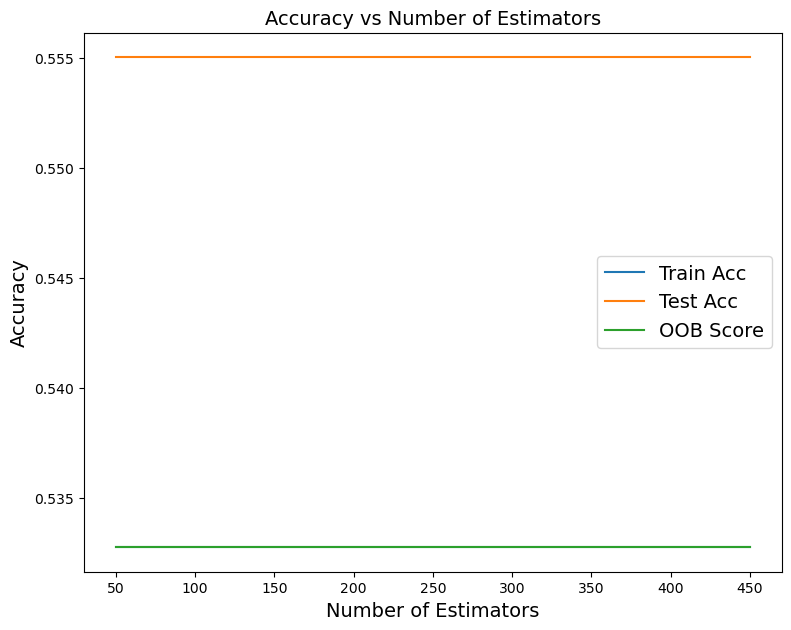

In [62]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5550239234449761

In [64]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

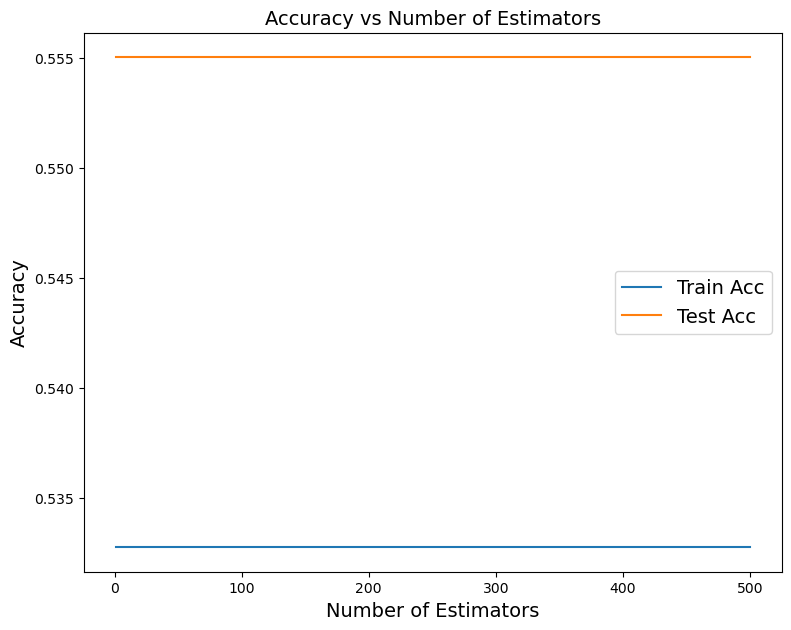

In [65]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XAI using LIME


In [ ]:
# conda install -c conda-forge shap
# conda install -c conda-forge ds-lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
feature_names = X_train.columns
#X_train.columns.values.tolist()
class_names = y_train.name

In [ ]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['alc'])

In [ ]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [ ]:
# Generate explanations using LIME
explanation_lime = explainer.explain_instance(instance, best_grid_dt.predict_proba, num_features=len(feature_names))


In [ ]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_dt.predict_proba([instance]))



In [ ]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

## XAI using SHAP

In [ ]:
import shap

In [ ]:
# Generate explanations using SHAP
explainer_shap = shap.Explainer(best_grid_dt)

In [ ]:
# Plot the summary plot of SHAP values
shap_values = shap.TreeExplainer(best_grid_dt).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]

# Get the SHAP values for the predicted class
shap_values = explainer_shap(instance)

# Get the expected value for the predicted class
expected_value = explainer_shap.expected_value

In [ ]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
#true_label = y_test.values[instance_idx]

In [ ]:
shap_values = explainer_shap.shap_values(X_test)

In [ ]:
# Get the SHAP values and expected values for the predicted class
shap_values_instance = shap_values[instance_idx]
expected_value = explainer_shap.expected_value[true_label]

In [ ]:
# Print the SHAP values for the instance
print("SHAP Values:")
for feature, shap_value in zip(feature_names, shap_values_instance):
    print(feature, shap_value)

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(best_grid_rf)

In [ ]:
# Calculate Shap values
choosen_instance = X_test.loc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)